In [3]:
# Load required modules
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import os
import xarray as xr
import pandas as pd
from tqdm import tqdm

#### Tara_BMN_Cleaned.csv

In [4]:
df = pd.read_csv(
        "/Users/annaolsen/Desktop/Speciale/DS_thesis/data/Tara_BMN_Cleaned.csv")
df = df.dropna(subset=['Longitude', 'Latitude'])

print(df.shape)

df = df.dropna(subset=['Longitude', 'Latitude'])

print(df.shape)

(34717, 79)
(34717, 79)


#### TARA_SST_locations_XYZ.csv

In [5]:
# df_TARA = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/Tara_SST_locations_XYZ.csv")
df_TARA = pd.read_csv("/Users/annaolsen/Desktop/Tara_SST_locations_XYZ.csv")

print(df_TARA.shape)
# print(df_TARA.head())

df_TARA['location'] = list(zip(df_TARA['lat'], df_TARA['lon']))

# Convert the "date" column to datetime format
df_TARA['Date'] = pd.to_datetime(df_TARA['Date'])

print(df_TARA.head())

(34717, 8)
         Sample ID  Latitude  Longitude  Sea Surface Temp       Date  \
0  TARA_A100000004   39.9100    12.8266         20.559598 2009-10-20   
1  TARA_A100000005   39.9100    12.8266         20.559598 2009-10-20   
2  TARA_A100000008   39.9100    12.8266         20.559598 2009-10-20   
3  TARA_A100000009   39.9100    12.8266         20.559598 2009-10-20   
4  TARA_A100000022   39.8989    12.9034         20.530829 2009-10-20   

           OS region     lat     lon          location  
0  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
1  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
2  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
3  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
4  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  


#### merged_SST_1981_2013.csv

In [6]:
# df_sst = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/SST_subsets/merged_SST_1981_2013.csv")
df_sst = pd.read_csv("/Users/annaolsen/Desktop/merged_SST_1981_2013.csv")

print(df_sst.head())
print(df_sst.shape)

      lon     lat        date       temp
0  12.875  39.875  1981-09-01  24.449999
1  12.875  39.875  1981-09-02  24.680000
2  12.875  39.875  1981-09-03  24.840000
3  12.875  39.875  1981-09-04  24.600000
4  12.875  39.875  1981-09-05  24.400000
(6554550, 4)


#### All Marine Heatwaves detected at sample locations from 1981-2013
mhws_info_XYZ.csv

In [7]:
# df_mhws = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/SST_subsets/mhws_info_XYZ.csv")
df_mhws = pd.read_csv("/Users/annaolsen/Desktop/mhws_info_XYZ.csv")

print(df_mhws.head())
print(df_mhws.shape)

print(df_mhws['n_events'].max())
print(df_mhws['location'].value_counts())
# df_mhws.sort_values(by='date_end')
# print(df_mhws.tail())


   time_start  time_end  time_peak  date_start    date_end   date_peak  \
0      723641    723646     723643  1982-04-06  1982-04-11  1982-04-08   
1      723812    723825     723816  1982-09-24  1982-10-07  1982-09-28   
2      723914    723918     723917  1983-01-04  1983-01-08  1983-01-07   
3      724121    724125     724122  1983-07-30  1983-08-03  1983-07-31   
4      724622    724626     724624  1984-12-12  1984-12-16  1984-12-14   

   index_start  index_end  index_peak  duration  ...  \
0          217        222         219         6  ...   
1          388        401         392        14  ...   
2          490        494         493         5  ...   
3          697        701         698         5  ...   
4         1198       1202        1200         5  ...   

   intensity_cumulative_relThresh  intensity_max_abs  intensity_mean_abs  \
0                        1.963583              16.48           16.305000   
1                        4.067099              25.58           24.

#### MHWs from 2009-2013 
(mhws_info_XYZ.csv)

In [8]:
# Convert the "date" columns to datetime format
df_mhws['date_start'] = pd.to_datetime(df_mhws['date_start'])
df_mhws['date_end'] = pd.to_datetime(df_mhws['date_end'])

# Subset the DataFrame based on the condition
subset_df = df_mhws[(df_mhws['date_start'].dt.year >= 2009) & (df_mhws['date_start'].dt.year <= 2013)]

# Print the subset DataFrame
print(subset_df)
print(subset_df.shape)

# print(subset_df['location'].value_counts())
print(subset_df['duration'].max())
print(subset_df.sort_values(by='duration'))

       time_start  time_end  time_peak date_start   date_end   date_peak  \
49         733424    733432     733431 2009-01-17 2009-01-25  2009-01-24   
50         733534    733541     733539 2009-05-07 2009-05-14  2009-05-12   
51         733549    733558     733553 2009-05-22 2009-05-31  2009-05-26   
52         733572    733578     733573 2009-06-14 2009-06-20  2009-06-15   
53         733645    733658     733655 2009-08-26 2009-09-08  2009-09-05   
...           ...       ...        ...        ...        ...         ...   
34892      734770    734839     734801 2012-09-24 2012-12-02  2012-10-25   
34893      734971    734980     734976 2013-04-13 2013-04-22  2013-04-18   
34894      735075    735079     735076 2013-07-26 2013-07-30  2013-07-27   
34895      735161    735167     735162 2013-10-20 2013-10-26  2013-10-21   
34896      735171    735177     735172 2013-10-30 2013-11-05  2013-10-31   

       index_start  index_end  index_peak  duration  ...  \
49           10000      100

### Match locations and dates to TARA

date_end is within 30 days before "Date" -> 9381 rows (121 locations, 92 dates)

date_peak is within 30 days before "Date" -> 8737 rows (120 locations, 89 dates)

In [9]:
from datetime import timedelta


# Convert date columns to datetime objects if they are not already
df_TARA['Date'] = pd.to_datetime(df_TARA['Date'])
subset_df = subset_df.copy()  # Create a copy of the DataFrame
subset_df['date_end'] = pd.to_datetime(subset_df['date_end'])
subset_df['date_peak'] = pd.to_datetime(subset_df['date_peak'])

# Convert the 'location' column to strings in both dataframes
df_TARA['location'] = df_TARA['location'].astype(str)
subset_df['location'] = subset_df['location'].astype(str)

print(f"Shape of df_TARA: {df_TARA.shape} \nShape of subset_df: {subset_df.shape}")

# Merge dataframes based on location
merged_df = pd.merge(df_TARA, subset_df, on='location')

print()
print(f"Shape of merged_df: {merged_df.shape}")
# print(merged_df['Sample ID'].value_counts())

# merged_df = merged_df[['Sample ID', 'Date', 'location', 'date_start', 'date_peak', 'intensity_mean_abs']]
# merged_df = merged_df.sort_values(by='n_events', ascending=False)
print(merged_df['location'].value_counts())
# print(len(merged_df[merged_df['Sample ID']== "TARA_G100007490"]))
# print(merged_df[merged_df['location']== "(36.375, -72.625)"][1000:1030])
# print(merged_df[merged_df['location']== "(23.375, 37.125)"])


# Filter rows where date_end is within 30 days before "Date"
filtered_df = merged_df[(merged_df['date_peak'] >= (merged_df['Date'] - timedelta(days=30))) & (merged_df['date_peak'] <= merged_df['Date'])]

# Print or do whatever you want with the filtered_df dataframe
# print(f"Shape of filtered_df: {filtered_df.shape}")
# TARA_P000001091
# TARA_G100007498
# TARA_G100007490
# TARA_G100007638
# TARA_G100007639
# # print(filtered_df.columns)

# print(filtered_df.head())
# print(filtered_df[filtered_df['Sample ID']== "TARA_G100007490"])

print(filtered_df[filtered_df['duration'] == 42])

print(filtered_df)
# print(filtered_df['category'].value_counts())

# filtered_df.to_csv("/Users/annaolsen/Desktop/mhws_TARA_plot.csv", index=False)

Shape of df_TARA: (34717, 9) 
Shape of subset_df: (7760, 31)

Shape of merged_df: (488190, 39)
location
(14.125, -116.625)     10833
(36.375, -72.875)       7872
(20.875, 63.625)        6660
(39.125, -70.125)       6624
(70.875, -53.625)       6104
                       ...  
(-4.375, -82.875)          3
(-33.625, -72.125)         3
(41.375, -20.125)          3
(-9.875, -91.625)          3
(-25.375, -111.125)        2
Name: count, Length: 555, dtype: int64
              Sample ID  Latitude  Longitude  Sea Surface Temp       Date  \
56754   TARA_A200000227   43.3482     7.9010         21.898506 2009-10-11   
56779   TARA_A200000228   43.3448     7.9114         21.909978 2009-10-11   
56804   TARA_X000000035   43.3430     7.8899         21.898506 2009-10-11   
56829   TARA_X000000036   43.3430     7.8899         21.898506 2009-10-11   
56854   TARA_X000000037   43.3430     7.8899         21.898506 2009-10-11   
56879   TARA_X000000038   43.3430     7.8899         21.898506 2009-10-11   

In [15]:
filtered_df = pd.read_csv("/Users/annaolsen/Desktop/mhws_TARA_plot.csv")

df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/Tara_BMN_Cleaned.csv")
df = df.dropna(subset=['Longitude', 'Latitude'])

# print(filtered_df[filtered_df['category']=='Strong'])


# Get the counts of Sample IDs in filtered_df
sample_counts = filtered_df['Sample ID'].value_counts()


# Group filtered_df by Sample ID and aggregate categories into lists
sample_info = filtered_df.groupby('Sample ID')['category'].agg(list).reset_index()

# Create a new dataframe with all unique Sample IDs from df
count_df = pd.DataFrame({'Sample ID': df['Sample ID'].unique()})

# Count occurrences of each Sample ID in small_df
count_df['MHWs'] = count_df['Sample ID'].map(sample_counts).fillna(0).astype(int)

# Merge category information to count_df
count_df = pd.merge(count_df, sample_info, on='Sample ID', how='left')

# print(count_df)
# print(count_df['MHWs'].value_counts())


df = pd.merge(df, count_df, on='Sample ID')

df['category'] = df['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Replace values in 'category'
category_replace = {
    'Moderate, Moderate': 'Moderate',
    'Moderate, Strong': 'Strong',
    'Strong, Moderate': 'Strong',
    'Moderate, Moderate, Moderate': 'Moderate',
}


# Apply replacements to 'category'
df['MHW-category'] = df['category'].replace(category_replace)

print(df['category'].value_counts())
print(df['category'].isna().sum())

print(df['MHW-category'].value_counts())
print(df['MHW-category'].isna().sum())

print(df['MHWs'].value_counts())
print(df.shape)
# print(df)

df.to_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash.csv", index=False)

category
Moderate                        5110
Moderate, Moderate               860
Strong                           693
Moderate, Strong                 274
Strong, Moderate                 171
Moderate, Moderate, Moderate     108
Name: count, dtype: int64
27501
MHW-category
Moderate    6078
Strong      1138
Name: count, dtype: int64
27501
MHWs
0    27501
1     5803
2     1305
3      108
Name: count, dtype: int64
(34717, 82)


In [11]:
# 5803+1305+108

# 6249 + 967
# 6078 + 693 + 445
a = 1.998373
print(f"{a:.2f}")

2.00


In [12]:
mhws_ids = set(filtered_df['Sample ID'])
tara_ids = set(df_TARA['Sample ID'])

no_mhws_ids = tara_ids - mhws_ids

print(f"MHWs IDs: {len(mhws_ids)}")
print(f"TARA IDs: {len(tara_ids)}")

print(f"TARA IDs without MHWs: {len(no_mhws_ids)}")

no_mhws_df = df_TARA[df_TARA['Sample ID'].isin(no_mhws_ids)]

print(no_mhws_df.shape)

print(filtered_df.head())

MHWs IDs: 7216
TARA IDs: 34717
TARA IDs without MHWs: 27501
(27501, 9)
         Sample ID  Latitude  Longitude  Sea Surface Temp        Date  \
0  TARA_A100001020   23.3600    37.2183         25.588009  2010-01-11   
1  TARA_A100001022   23.4183    37.2450         25.466657  2010-01-11   
2  TARA_A100001023   23.4183    37.2450         25.466657  2010-01-11   
3  TARA_A100001024   23.3600    37.2183         25.588009  2010-01-11   
4  TARA_A100001025   23.3600    37.2183         25.588009  2010-01-11   

  OS region     lat     lon          location  time_start  ...  \
0   Red Sea  23.375  37.125  (23.375, 37.125)      733779  ...   
1   Red Sea  23.375  37.125  (23.375, 37.125)      733779  ...   
2   Red Sea  23.375  37.125  (23.375, 37.125)      733779  ...   
3   Red Sea  23.375  37.125  (23.375, 37.125)      733779  ...   
4   Red Sea  23.375  37.125  (23.375, 37.125)      733779  ...   

   intensity_var_relThresh  intensity_cumulative_relThresh intensity_max_abs  \
0            

/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_8120/362435713.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


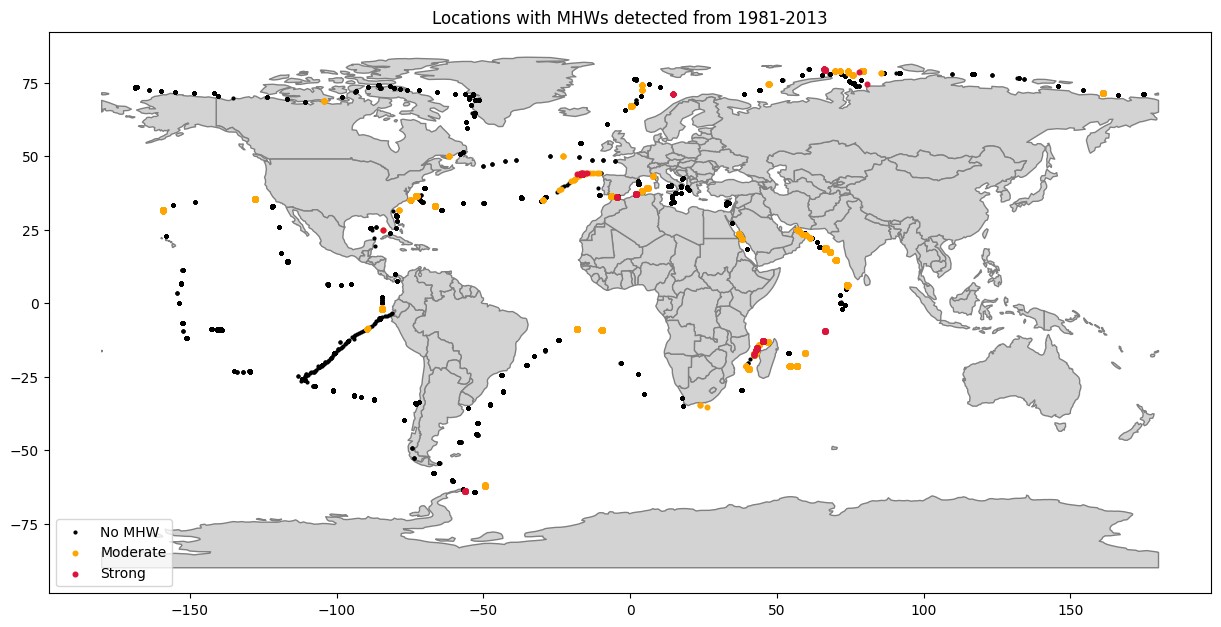

In [13]:
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


strong_df = filtered_df[filtered_df['category'] == 'Strong']
moderate_df = filtered_df[filtered_df['category'] == 'Moderate']


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))

# Plot world map
world.plot(ax=ax, color='lightgray', edgecolor='grey')

# Plot closest match points
ax.scatter(no_mhws_df['Longitude'], no_mhws_df['Latitude'],
           color='black', label='No MHW', s=4)

# Plot original points
ax.scatter(moderate_df['Longitude'], moderate_df['Latitude'],
           color='orange', label='Moderate', s=11)

# Plot closest match points
ax.scatter(strong_df['Longitude'], strong_df['Latitude'],
           color='crimson', label='Strong', s=11)



# Set title
ax.set_title('Locations with MHWs detected from 1981-2013')
# Add legend
ax.legend()

plt.show()


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_8120/1361355700.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


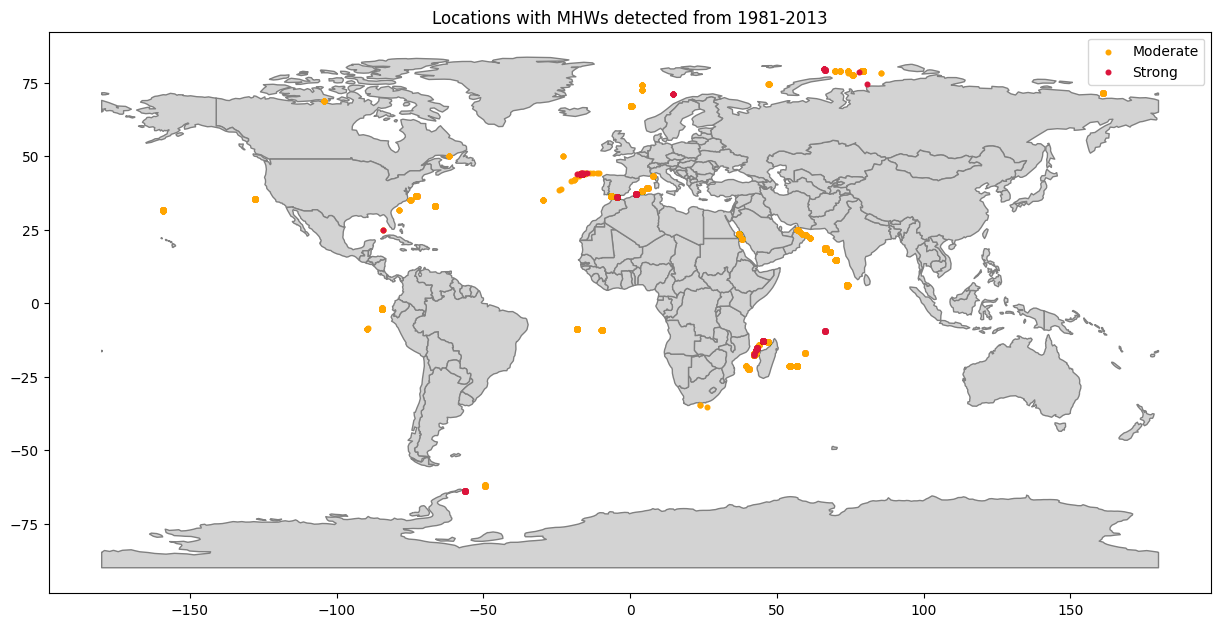

In [14]:

strong_df = filtered_df[filtered_df['category'] == 'Strong']
moderate_df = filtered_df[filtered_df['category'] == 'Moderate']


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))

# Plot world map
world.plot(ax=ax, color='lightgray', edgecolor='grey')

# # Plot closest match points
# ax.scatter(no_mhws_df['Longitude'], no_mhws_df['Latitude'],
#            color='black', label='No MHW', s=4)

# Plot original points
ax.scatter(moderate_df['Longitude'], moderate_df['Latitude'],
           color='orange', label='Moderate', s=11)

# Plot closest match points
ax.scatter(strong_df['Longitude'], strong_df['Latitude'],
           color='crimson', label='Strong', s=11)



# Set title
ax.set_title('Locations with MHWs detected from 1981-2013')
# Add legend
ax.legend()

plt.show()
